In [1]:
import pandas as pd
import numpy as np
import sys

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import json
import unidecode

In [17]:
%matplotlib inline

In [18]:
# Reading json file that was generated via an API call
data = pd.read_json('playersSeason2020.json')

In [19]:
# Cleaning data in table by removing accents 
data['name'] = [unidecode.unidecode(col) for col in data['name']]

# Cleaning data, orginial data was a one word list of position
data['positions'] = [pos[0] for pos in data['positions']]

# Clean dataFrame
data.head(5)

,age,assists,attempted_field_goals,attempted_free_throws,attempted_three_point_field_goals,blocks,defensive_rebounds,games_played,games_started,made_field_goals,...,made_three_point_field_goals,minutes_played,name,offensive_rebounds,personal_fouls,positions,slug,steals,team,turnovers
0,26,62,174,66,1,29,139,22,22,106,...,0,600,Steven Adams,71,43,CENTER,adamsst01,10,OKLAHOMA CITY THUNDER,31
1,22,120,255,149,8,31,209,26,26,149,...,1,878,Bam Adebayo,67,70,CENTER,adebaba01,36,MIAMI HEAT,75
2,34,55,348,87,38,41,117,23,23,174,...,13,768,LaMarcus Aldridge,47,51,CENTER,aldrila01,14,SAN ANTONIO SPURS,37
3,21,40,148,16,79,2,43,22,0,49,...,27,301,Nickeil Alexander-Walker,4,27,SHOOTING GUARD,alexani01,9,NEW ORLEANS PELICANS,24
4,24,19,92,17,43,1,36,13,0,38,...,15,246,Grayson Allen,2,21,SHOOTING GUARD,allengr01,5,MEMPHIS GRIZZLIES,15


In [20]:
#Fulfilling the *args request based on target columns
cols = []
def colsdata (*args):
    for arg in args:
        cols.append(arg)

colsdata('made_field_goals','made_free_throws','made_three_point_field_goals','defensive_rebounds',
              'offensive_rebounds', 'turnovers', 'assists')

print(cols)

['made_field_goals', 'made_free_throws', 'made_three_point_field_goals', 'defensive_rebounds', 'offensive_rebounds', 'turnovers', 'assists']


In [37]:
# Class section of the analysis 
class NbaGraphs:
    def __init__(self, position):
        self.position = position.upper()
        self.f, self.axes = plt.subplots(1, 2, figsize=(10, 10), sharex=True)
    
    def fieldGoal(self):
        return  sns.distplot(data.loc[data['positions'] == self.position]['made_field_goals'] , color="skyblue", ax=self.axes[0])
   
    def turnOvers(self): 
        return  sns.distplot(data.loc[data['positions'] == self.position]['turnovers'] , color="red", ax=self.axes[1]) 
    

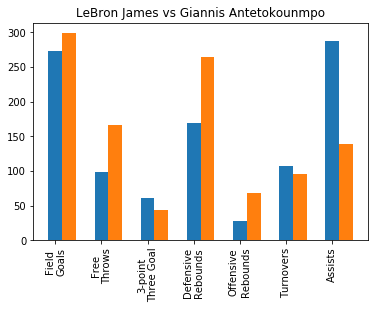

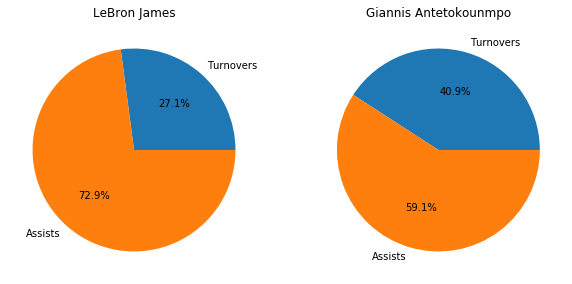

In [30]:
dataPlayerName1 = ''
dataPlayerName2 = ''

def comparePlayers (player1, player2):
    num = 0
    num1 = 0
    for playerData in data['name']:
        if playerData.lower() != player1.lower():
            num += 1
            if num >= len(data['name']):
                print('incorrect spelling') 
                sys.exit()
        else:
            dataPlayerName1 = data.loc[data['name'].str.lower() == player1.lower(), 'name'].values[0]
        

    for playerData in data['name']:
        if playerData.lower() != player2.lower():
            num1 += 1
            if num1 >= len(data['name']):
                print('incorrect spelling') 
                sys.exit()
        else:
            dataPlayerName2 = data.loc[data['name'].str.lower() == player2.lower(), 'name'].values[0]
    
    playerStats1 = []
    playerStats2 = []
    for num in cols:
        if dataPlayerName1.lower() == player1.lower():
            sumPlayerData1 = data.loc[data['name'].str.lower() == player1.lower(), num].values[0]
            playerStats1.append(sumPlayerData1)
    
    for num in cols:
        if dataPlayerName2.lower() == player2.lower():
            sumPlayerData2 = data.loc[data['name'].str.lower() == player2.lower(), num].values[0]
            playerStats2.append(sumPlayerData2)
    
    # Setting up the labels for the x axis plot 
    playerX_axis = ('Field\nGoals','Free\nThrows', '3-point\nThree Goal', 'Defensive\nRebounds', 'Offensive\nRebounds', 'Turnovers', 'Assists')

    y_pos = np.arange(len(playerX_axis))

    # Create bars for chart
    width =0.3
    plt.bar(y_pos, playerStats1, width=width, label=dataPlayerName1)
    plt.bar(y_pos+ width, playerStats2, width=width, label=dataPlayerName2)

    # Create names on the x-axis and rotate vertically
    plt.xticks(y_pos, playerX_axis, rotation='vertical')

    # Create Title
    plt.title(dataPlayerName1 +' vs '+ dataPlayerName2)
    plt.show()
    
    # Create Assist/Turnover Pie Chart
    fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
    ax1.pie(playerStats1[-2:],labels = playerX_axis[-2:],autopct = '%1.1f%%')
    ax1.set_title(dataPlayerName1)
    ax2.pie(playerStats2[-2:],labels = playerX_axis[-2:],autopct = '%1.1f%%')
    ax2.set_title(dataPlayerName2)
    plt.show()
comparePlayers ('lebron james', 'Giannis Antetokounmpo')

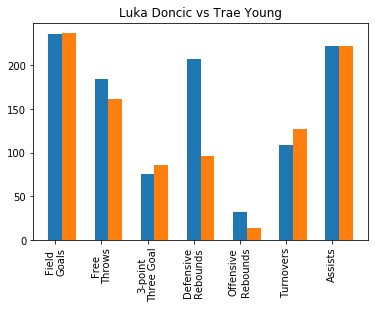

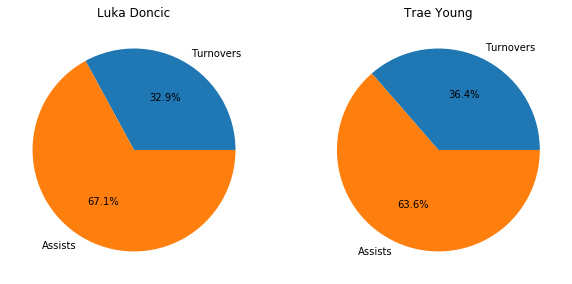

In [31]:
comparePlayers ('luka doncic', 'Trae Young')


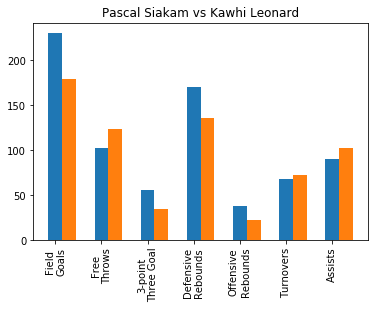

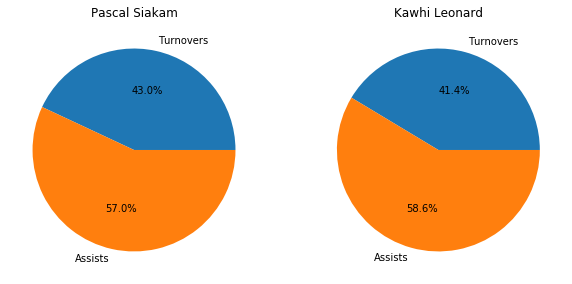

In [32]:
comparePlayers ('pascal siakam', 'kawhi leonard')

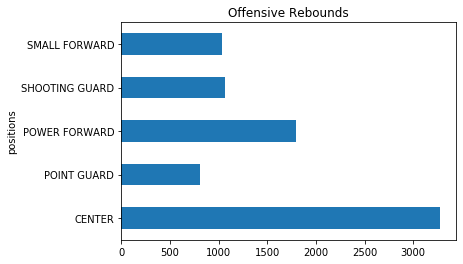

In [27]:
data.groupby('positions')['offensive_rebounds'].sum().plot(kind='barh', title='Offensive Rebounds')

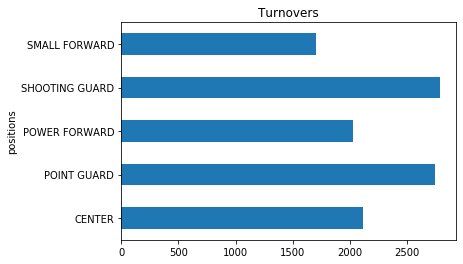

In [29]:
data.groupby('positions')['turnovers'].sum().plot(kind='barh', title='Turnovers')

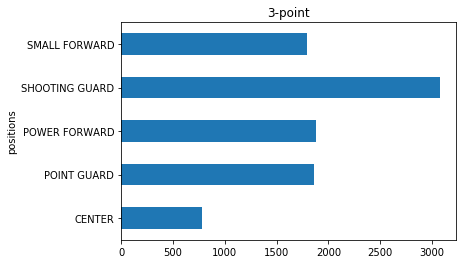

In [33]:
data.groupby('positions')['made_three_point_field_goals'].sum().plot(kind='barh', title='3-point')

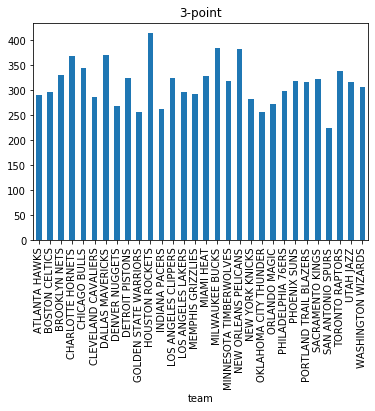

In [35]:
data.groupby('team')['made_three_point_field_goals'].sum().plot(kind='bar', title='3-point')

In [41]:
data.groupby('team')['assists'].sum().sort_values(ascending=False)

team
PHILADELPHIA 76ERS        741
PHOENIX SUNS              710
LOS ANGELES LAKERS        707
MILWAUKEE BUCKS           697
MEMPHIS GRIZZLIES         690
CHARLOTTE HORNETS         683
NEW ORLEANS PELICANS      676
INDIANA PACERS            672
WASHINGTON WIZARDS        671
GOLDEN STATE WARRIORS     664
MIAMI HEAT                658
DENVER NUGGETS            658
CHICAGO BULLS             646
DETROIT PISTONS           646
LOS ANGELES CLIPPERS      645
ATLANTA HAWKS             638
BROOKLYN NETS             628
TORONTO RAPTORS           624
DALLAS MAVERICKS          615
SAN ANTONIO SPURS         607
ORLANDO MAGIC             591
SACRAMENTO KINGS          582
MINNESOTA TIMBERWOLVES    574
HOUSTON ROCKETS           565
BOSTON CELTICS            563
UTAH JAZZ                 557
CLEVELAND CAVALIERS       545
NEW YORK KNICKS           544
OKLAHOMA CITY THUNDER     540
PORTLAND TRAIL BLAZERS    525
Name: assists, dtype: int64

AxesSubplot(0.125,0.125;0.352273x0.755)
AxesSubplot(0.547727,0.125;0.352273x0.755)


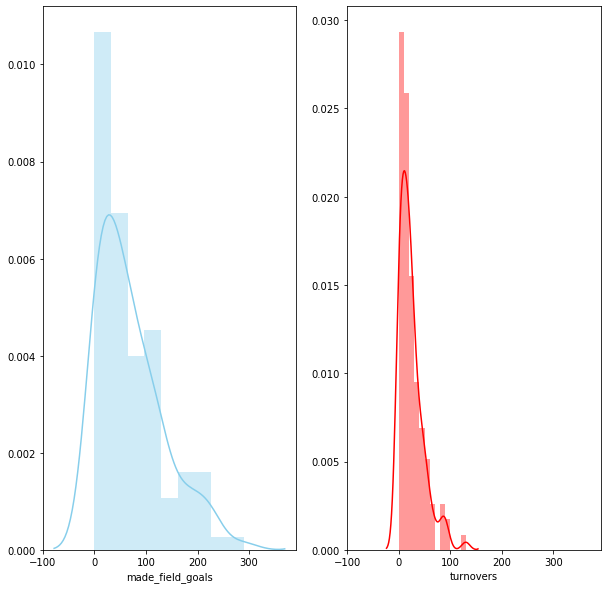

In [38]:
heat = NbaGraphs('shooting guard')

print(heat.fieldGoal())
print(heat.turnOvers())

In [42]:
data.describe()

,age,assists,attempted_field_goals,attempted_free_throws,attempted_three_point_field_goals,blocks,defensive_rebounds,games_played,games_started,made_field_goals,made_free_throws,made_three_point_field_goals,minutes_played,offensive_rebounds,personal_fouls,steals,turnovers
count,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000,466.000000
mean,25.630901,40.476395,149.761803,38.806867,56.755365,8.538627,58.989270,17.918455,8.433476,68.051502,29.821888,20.158798,407.609442,17.115880,35.650215,12.959227,24.424893
std,4.092615,44.083309,130.140508,44.796376,57.218392,10.340421,51.489115,8.513481,10.222307,60.704020,36.040784,21.933636,283.934473,18.997325,25.154575,11.135164,22.580507
min,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22.000000,8.000000,44.000000,7.250000,7.250000,2.000000,18.000000,11.000000,0.000000,18.000000,5.000000,1.000000,151.000000,4.000000,14.000000,4.000000,6.000000
50%,25.000000,27.500000,123.500000,24.000000,40.500000,5.000000,49.000000,21.000000,2.000000,57.000000,18.000000,13.000000,394.000000,11.000000,34.000000,11.000000,19.000000
75%,28.000000,55.000000,223.750000,53.000000,92.000000,11.750000,89.000000,25.000000,19.000000,101.000000,41.000000,32.000000,643.250000,24.000000,54.000000,20.000000,36.000000
max,43.000000,288.000000,650.000000,349.000000,363.000000,68.000000,301.000000,29.000000,29.000000,299.000000,308.000000,131.000000,988.000000,115.000000,114.000000,55.000000,130.000000


In [43]:
data.groupby('positions')['age'].mean()

positions
CENTER            25.896552
POINT GUARD       26.192771
POWER FORWARD     25.709677
SHOOTING GUARD    25.008621
SMALL FORWARD     25.574713
Name: age, dtype: float64